In [41]:
from mplsoccer.pitch import Pitch
from mplsoccer.statsbomb import read_event, read_lineup, EVENT_SLUG, LINEUP_SLUG
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

# get event and lineup dataframes for game 8658

# event data
dict_event = read_event(f'{EVENT_SLUG}/8658.json', related_event_df=False, tactics_lineup_df=False, warn=False)
df_event = dict_event['event']
df_freeze = dict_event['shot_freeze_frame']

# lineup data
df_lineup = read_lineup(f'{LINEUP_SLUG}/8658.json', warn=False)
df_lineup = df_lineup[['player_id', 'player_jersey_number', 'team_name']].copy()

In [42]:
df_event.head(5)

,match_id,id,index,period,timestamp_minute,timestamp_second,timestamp_millisecond,minute,second,type_id,type_name,sub_type_id,sub_type_name,outcome_id,outcome_name,play_pattern_id,play_pattern_name,possession_team_id,possession,possession_team_name,team_id,team_name,player_id,player_name,position_id,position_name,duration,x,y,z,end_x,end_y,end_z,body_part_id,body_part_name,technique_id,technique_name,under_pressure,counterpress,pass_length,pass_angle,pass_recipient_id,pass_recipient_name,pass_height_id,pass_height_name,pass_switch,pass_cross,pass_backheel,pass_assisted_shot_id,pass_shot_assist,pass_goal_assist,pass_cut_back,pass_deflected,ball_recovery_recovery_failure,block_deflection,dribble_overrun,foul_committed_type_id,foul_committed_type_name,foul_committed_advantage,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_defensive,foul_won_advantage,goalkeeper_position_id,goalkeeper_position_name,injury_stoppage_in_chain,shot_statsbomb_xg,shot_key_pass_id,shot_deflected,shot_first_time,substitution_replacement_id,substitution_replacement_name,tactics_formation,aerial_won
0,8658,47638847-fd43-4656-b49c-cff64e5cfc0a,1,1,0,0,0,0,0,35,Starting XI,NaN,NaN,NaN,NaN,1,Regular Play,771,1,France,771,France,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.0,NaN
1,8658,0c04305d-5615-4520-9be5-7c232829954b,2,1,0,0,0,0,0,35,Starting XI,NaN,NaN,NaN,NaN,1,Regular Play,771,1,France,785,Croatia,NaN,NaN,NaN,NaN,1.412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433.0,NaN
2,8658,c5e17439-efe2-480b-9cff-1600998674d7,3,1,0,0,0,0,0,18,Half Start,NaN,NaN,NaN,NaN,1,Regular Play,771,1,France,771,France,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8658,7e1460eb-c572-4059-8cd4-cec4857f818d,4,1,0,0,0,0,0,18,Half Start,NaN,NaN,NaN,NaN,1,Regular Play,771,1,France,785,Croatia,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8658,918ffaaf-3cee-41e5-87e2-4bcc8d43a859,5,1,0,0,400,0,0,30,Pass,65.0,Kick Off,NaN,NaN,9,From Kick Off,785,2,Croatia,785,Croatia,5472.0,Mario Mandžukić,23.0,Center Forward,1.159,61.0,41.0,NaN,50.0,42.0,NaN,40.0,Right Foot,NaN,NaN,NaN,NaN,11.045361,3.050933,5469.0,Marcelo Brozović,1.0,Ground Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Excluding (...) for large number of columns
pd.set_option("display.max.columns", None)

df_shots = df_event.loc[(df_event['type_name'] == 'Shot') & (df_event['outcome_name'] == 'Goal')]
df_shots


,match_id,id,index,period,timestamp_minute,timestamp_second,timestamp_millisecond,minute,second,type_id,type_name,sub_type_id,sub_type_name,outcome_id,outcome_name,play_pattern_id,play_pattern_name,possession_team_id,possession,possession_team_name,team_id,team_name,player_id,player_name,position_id,position_name,duration,x,y,z,end_x,end_y,end_z,body_part_id,body_part_name,technique_id,technique_name,under_pressure,counterpress,pass_length,pass_angle,pass_recipient_id,pass_recipient_name,pass_height_id,pass_height_name,pass_switch,pass_cross,pass_backheel,pass_assisted_shot_id,pass_shot_assist,pass_goal_assist,pass_cut_back,pass_deflected,ball_recovery_recovery_failure,block_deflection,dribble_overrun,foul_committed_type_id,foul_committed_type_name,foul_committed_advantage,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_defensive,foul_won_advantage,goalkeeper_position_id,goalkeeper_position_name,injury_stoppage_in_chain,shot_statsbomb_xg,shot_key_pass_id,shot_deflected,shot_first_time,substitution_replacement_id,substitution_replacement_name,tactics_formation,aerial_won
910,8658,dd524196-386d-4759-b40b-e920cc77b059,911,1,27,53,880,27,53,16,Shot,87.0,Open Play,97.0,Goal,3,From Free Kick,785,58,Croatia,785,Croatia,5474.0,Ivan Perišić,21.0,Left Wing,0.587,105.0,32.0,NaN,120.0,43.6,0.8,38.0,Left Foot,91.0,Half Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063829,239d4230-e8d1-4e17-b9dd-b7f57faf3ecb,True,NaN,NaN,NaN,NaN,NaN
1052,8658,ad19fde7-da37-4430-b1a3-2293ae7c4fff,1053,1,37,56,787,37,56,16,Shot,88.0,Penalty,97.0,Goal,5,Other,771,73,France,771,France,5487.0,Antoine Griezmann,22.0,Right Center Forward,0.533,108.0,40.0,NaN,120.0,37.6,0.1,38.0,Left Foot,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1862,8658,1ff32d30-cf80-4775-997f-0841694c6069,1863,2,13,33,907,58,33,16,Shot,87.0,Open Play,97.0,Goal,4,From Throw In,771,120,France,771,France,20004.0,Paul Pogba,9.0,Right Defensive Midfield,1.053,102.0,39.0,NaN,120.0,37.6,1.0,38.0,Left Foot,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061371,NaN,NaN,True,NaN,NaN,NaN,NaN
2059,8658,a8692197-bb35-453d-9191-fe7daa25f8df,2060,2,19,36,707,64,36,16,Shot,87.0,Open Play,97.0,Goal,1,Regular Play,771,128,France,771,France,3009.0,Kylian Mbappé Lottin,12.0,Right Midfield,0.933,94.0,40.0,NaN,120.0,37.0,0.3,40.0,Right Foot,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032754,768d8856-3f1f-4191-9c37-12fef08d54c3,NaN,NaN,NaN,NaN,NaN,NaN
2170,8658,1b5307e5-c1c7-4017-ba64-477e2b5cc2c1,2171,2,23,8,107,68,8,16,Shot,87.0,Open Play,97.0,Goal,1,Regular Play,785,136,Croatia,785,Croatia,5472.0,Mario Mandžukić,23.0,Center Forward,0.680,114.0,43.0,NaN,120.0,36.6,0.4,40.0,Right Foot,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.557416,NaN,NaN,True,NaN,NaN,NaN,NaN


In [44]:
shot_id = 'dd524196-386d-4759-b40b-e920cc77b059'
df_freeze_frame = df_freeze[df_freeze.id == shot_id].copy()
df_shot_event = df_event[df_event.id == shot_id].dropna(axis=1, how='all').copy()

# add the jersey number
df_freeze_frame = df_freeze_frame.merge(df_lineup, how='left', on='player_id')

In [45]:
# strings for team names
team1 = df_shot_event.team_name.iloc[0]
team2 = list(set(df_event.team_name.unique()) - set([team1]))[0]

# subset the team shooting, and the opposition (goalkeeper/ other)
df_team1 = df_freeze_frame[df_freeze_frame.team_name == team1]
df_team2_goal = df_freeze_frame[(df_freeze_frame.team_name == team2) &
                                (df_freeze_frame.player_position_name == 'Goalkeeper')]
df_team2_other = df_freeze_frame[(df_freeze_frame.team_name == team2) &
                                 (df_freeze_frame.player_position_name != 'Goalkeeper')]

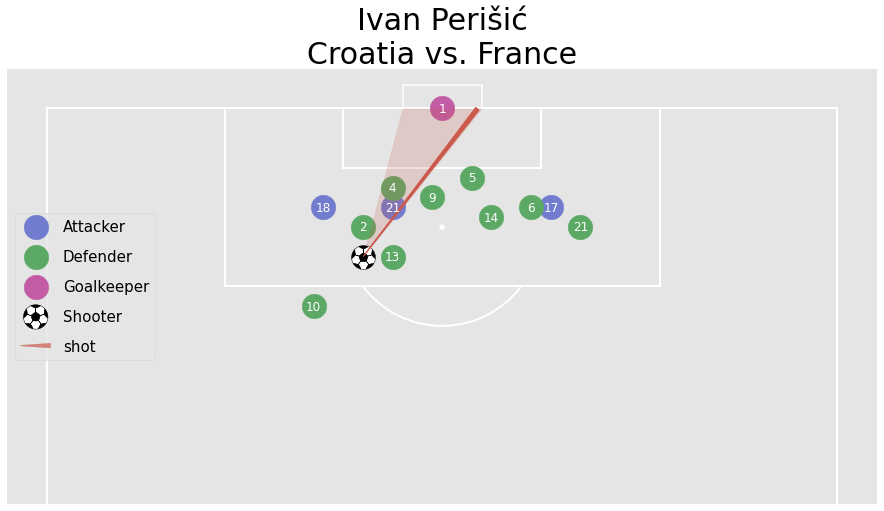

In [46]:
# Setup the pitch
figsize = (16, 8)
pitch = Pitch(figsize=figsize, orientation='vertical', view='half', tight_layout=False, goal_type='box', pad_bottom=-20)
fig, ax = pitch.draw()

# Plot the players
sc1 = pitch.scatter(df_team1.x, df_team1.y, s=600, c='#727cce', label='Attacker', ax=ax)
sc2 = pitch.scatter(df_team2_other.x, df_team2_other.y, s=600, c='#5ba965', label='Defender', ax=ax)
sc4 = pitch.scatter(df_team2_goal.x, df_team2_goal.y, s=600, ax=ax, c='#c15ca5', label='Goalkeeper')

# plot the shot
sc3 = pitch.scatter(df_shot_event.x, df_shot_event.y, marker='football', s=600, ax=ax, label='Shooter', zorder=1.2)
line = pitch.lines(df_shot_event.x, df_shot_event.y,
                   df_shot_event.end_x, df_shot_event.end_y, comet=True, label='shot', color='#cb5a4c', ax=ax)

# plot the angle to the goal
pitch.goal_angle(df_shot_event.x, df_shot_event.y, ax=ax, alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right')

# plot the jersey numbers
for i, label in enumerate(df_freeze_frame.player_jersey_number):
    pitch.annotate(label, (df_freeze_frame.x[i], df_freeze_frame.y[i]),
                   va='center', ha='center', color='white', fontsize=12, ax=ax)

# add a legend and title
legend = ax.legend(loc='center left', labelspacing=1, fontsize=15)
title = ax.set_title(f'{df_shot_event.player_name.iloc[0]}\n{team1} vs. {team2}', fontsize=30)